 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:

#from google.colab import drive
#drive.mount('/content/drive')


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns

whale=pd.read_csv('Resources/whale_returns.csv')

In [4]:
# Count nulls
whale.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale.dropna(inplace=True)

In [6]:
whale.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale.head(4)


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo=pd.read_csv('Resources/algo_returns.csv')

In [9]:
# Count nulls
algo.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx=pd.read_csv('Resources/sp_tsx_history.csv')

In [12]:
# Check Data Types
sp_tsx.dtypes

Date     object
Close    object
dtype: object

In [13]:

sp_tsx.head(4)

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"


In [14]:
# Fix data Types

sp_tsx['Date']=pd.to_datetime(sp_tsx['Date'])
sp_tsx['Close']=sp_tsx['Close'].str.replace('$', '')
sp_tsx['Close']=sp_tsx['Close'].str.replace(',', '')
sp_tsx['Close']=sp_tsx['Close'].astype(float)

In [15]:
sp_tsx.head(4)

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68


In [16]:
# Calculate Daily Returns
sp_tsx['Close']=sp_tsx['Close'].pct_change(1)

In [17]:
# Drop nulls
sp_tsx.dropna(inplace=True)

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx.rename(columns={'Close':'S&P TSX 60 Index Return'}, inplace=True)


In [19]:
sp_tsx


,Date,S&P TSX 60 Index Return
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709
...,...,...
1813,2019-12-20,0.003188
1814,2019-12-23,0.000600
1815,2019-12-24,0.003003
1816,2019-12-27,-0.000695


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
algo['Date']=pd.to_datetime(algo['Date'])
whale['Date']=pd.to_datetime(whale['Date'])
df_combine=pd.merge(pd.merge(sp_tsx,algo,on='Date', how='inner'),whale,on='Date', how='inner')
df_combine


,Date,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
1,2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2,2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
3,2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
4,2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...,...
1024,2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
1025,2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
1026,2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223
1027,2019-04-30,-0.001183,-0.002944,-0.001570,-0.001295,-0.002211,-0.000259,-0.003702


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [21]:
df_combine.columns

Index(['Date', 'S&P TSX 60 Index Return', 'Algo 1', 'Algo 2',
       'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

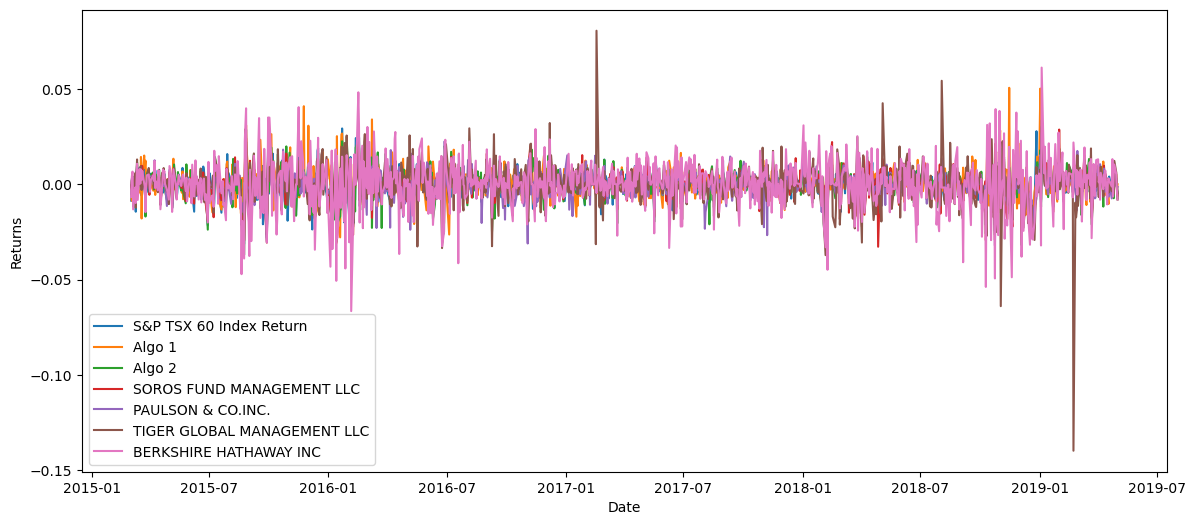

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot daily returns of all portfolios
plt.figure(figsize=(14,6))
sns.lineplot(df_combine['Date'],df_combine['S&P TSX 60 Index Return'], label='S&P TSX 60 Index Return')
sns.lineplot(df_combine['Date'],df_combine['Algo 1'], label='Algo 1')
sns.lineplot(df_combine['Date'],df_combine['Algo 2'], label='Algo 2')
sns.lineplot(df_combine['Date'],df_combine['SOROS FUND MANAGEMENT LLC'], label='SOROS FUND MANAGEMENT LLC')
sns.lineplot(df_combine['Date'],df_combine['PAULSON & CO.INC. '], label='PAULSON & CO.INC.')
sns.lineplot(df_combine['Date'],df_combine['TIGER GLOBAL MANAGEMENT LLC'], label='TIGER GLOBAL MANAGEMENT LLC')
sns.lineplot(df_combine['Date'],df_combine['BERKSHIRE HATHAWAY INC'], label='BERKSHIRE HATHAWAY INC')
plt.ylabel('Returns')
plt.show()

#### Calculate and Plot cumulative returns.

In [23]:
# Calculate cumulative returns of all portfolios
df_cumulative=df_combine.copy()
lis_of_columns=[list(df_cumulative.columns)[1:]]

for i in lis_of_columns:
  df_cumulative[i]=np.exp(np.log1p(df_cumulative[i]).cumsum()) - 1 


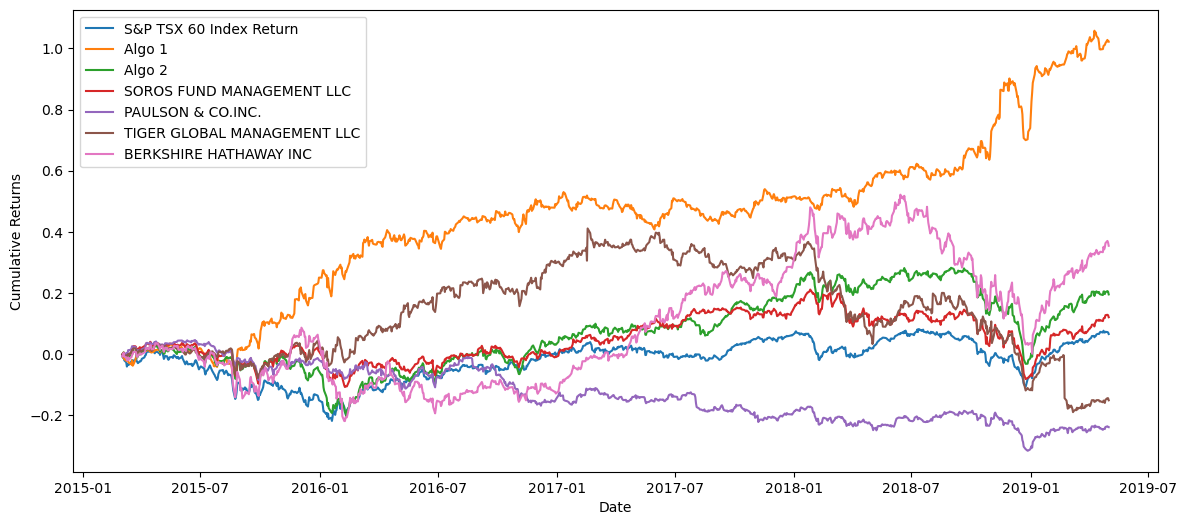

In [24]:
# Plot cumulative returns

# Plot cumulative returns
plt.figure(figsize=(14,6))
sns.lineplot(df_cumulative['Date'],df_cumulative['S&P TSX 60 Index Return'], label='S&P TSX 60 Index Return')
sns.lineplot(df_cumulative['Date'],df_cumulative['Algo 1'], label='Algo 1')
sns.lineplot(df_cumulative['Date'],df_cumulative['Algo 2'], label='Algo 2')
sns.lineplot(df_cumulative['Date'],df_cumulative['SOROS FUND MANAGEMENT LLC'], label='SOROS FUND MANAGEMENT LLC')
sns.lineplot(df_cumulative['Date'],df_cumulative['PAULSON & CO.INC. '], label='PAULSON & CO.INC.')
sns.lineplot(df_cumulative['Date'],df_cumulative['TIGER GLOBAL MANAGEMENT LLC'], label='TIGER GLOBAL MANAGEMENT LLC')
sns.lineplot(df_cumulative['Date'],df_cumulative['BERKSHIRE HATHAWAY INC'], label='BERKSHIRE HATHAWAY INC')
plt.ylabel('Cumulative Returns')
plt.show()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


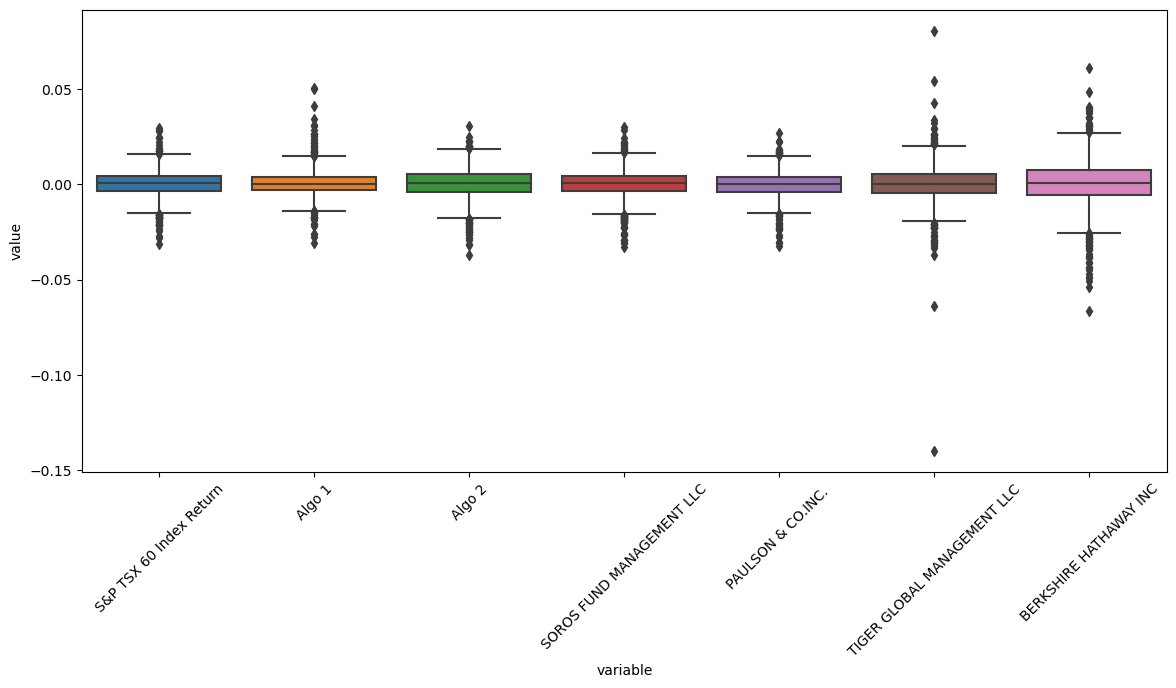

In [25]:
# Box plot to visually show risk
plt.figure(figsize=(14,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df_combine.drop('Date',axis=1)))
plt.xticks(rotation = 45)
plt.show()

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios

daily_std_df = pd.DataFrame(df_combine.drop('Date', axis=1).std()).rename(columns = {0:"Standard Deviation"})
daily_std_df

,Standard Deviation
S&P TSX 60 Index Return,0.007034
Algo 1,0.007589
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826


### Determine which portfolios are riskier than the S&P TSX 60

In [27]:
# Calculate  the daily standard deviation of S&P TSX 60

df_combine['S&P TSX 60 Index Return'].std()

# Determine which portfolios are riskier than the S&P TSX 60

higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["S&P TSX 60 Index Return", "Standard Deviation"]]
higher_std

,Standard Deviation
Algo 1,0.007589
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826


### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
for i in list(df_combine.columns)[1:]:
  A_STD = df_combine[i].std() * np.sqrt(252)
  print('Annualized_Standard_Deviation of ',i,' :',A_STD)
    

Annualized_Standard_Deviation of  S&P TSX 60 Index Return  : 0.11166395125828665
Annualized_Standard_Deviation of  Algo 1  : 0.12046978282616602
Annualized_Standard_Deviation of  Algo 2  : 0.13217686720232721
Annualized_Standard_Deviation of  SOROS FUND MANAGEMENT LLC  : 0.12425892537856896
Annualized_Standard_Deviation of  PAULSON & CO.INC.   : 0.11084093464082155
Annualized_Standard_Deviation of  TIGER GLOBAL MANAGEMENT LLC  : 0.17275886777147675
Annualized_Standard_Deviation of  BERKSHIRE HATHAWAY INC  : 0.20359875513511738


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [29]:
df_combine.columns

Index(['Date', 'S&P TSX 60 Index Return', 'Algo 1', 'Algo 2',
       'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.003370,0.005801,0.005764,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.003321,0.005562,0.005700,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.003356,0.005251,0.005622,0.004123,0.005374,0.005438,0.006584


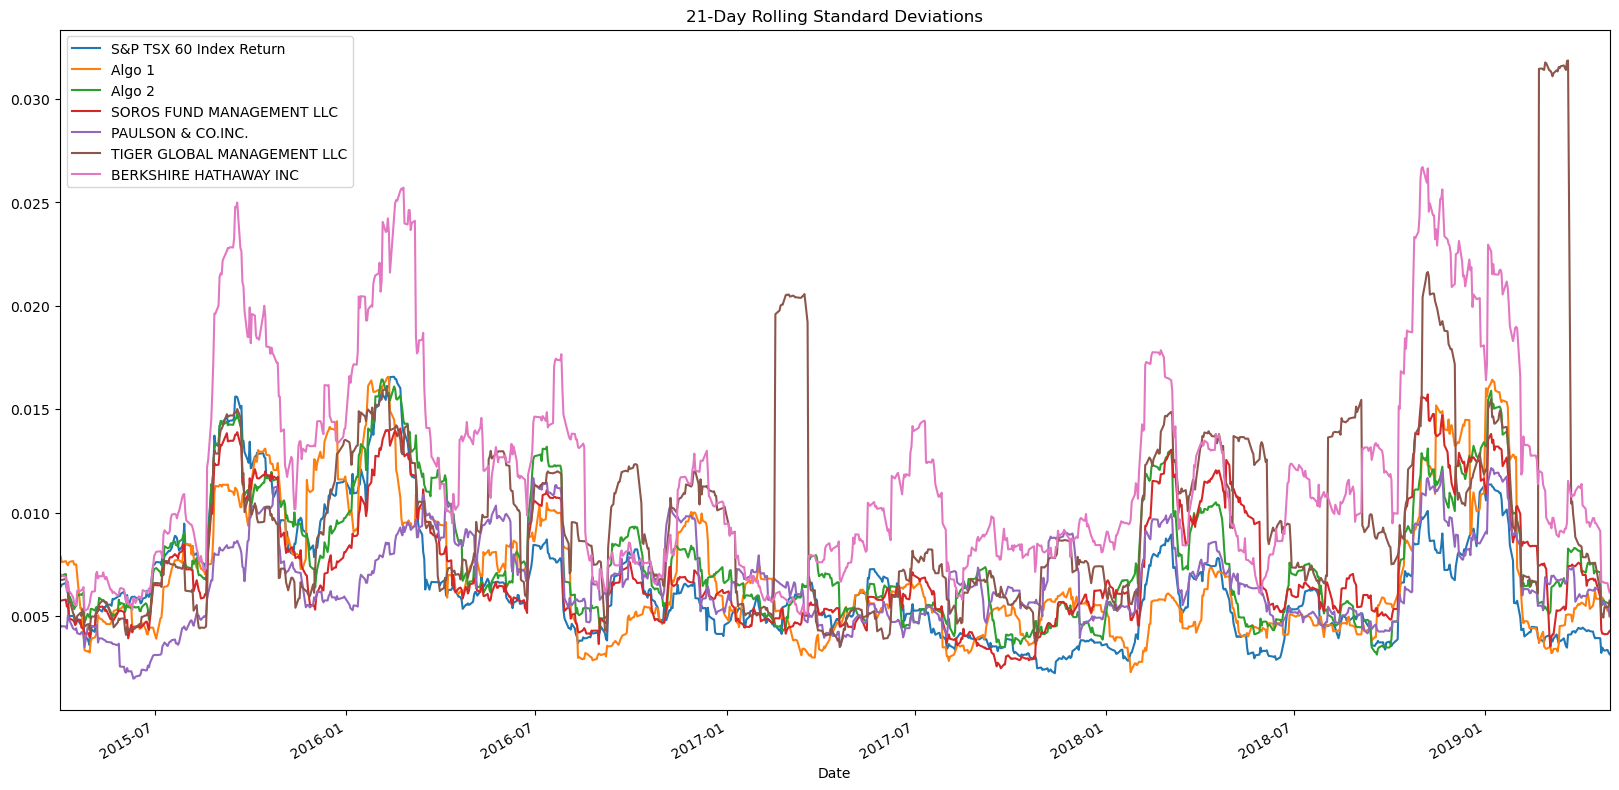

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

sp60_rolling_std = df_combine.set_index(df_combine['Date']).rolling(window=21).std()
display(sp60_rolling_std)

# Plot the rolling standard deviation
sp60_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)

### Calculate and plot the correlation

,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P TSX 60 Index Return,1.000000,0.310276,0.737370,0.673930,0.486511,0.440583,0.557250
Algo 1,0.310276,1.000000,0.285455,0.313795,0.266363,0.161236,0.289378
Algo 2,0.737370,0.285455,1.000000,0.826667,0.674015,0.506689,0.684609
SOROS FUND MANAGEMENT LLC,0.673930,0.313795,0.826667,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.486511,0.266363,0.674015,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.161236,0.506689,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.557250,0.289378,0.684609,0.750181,0.540033,0.423524,1.000000


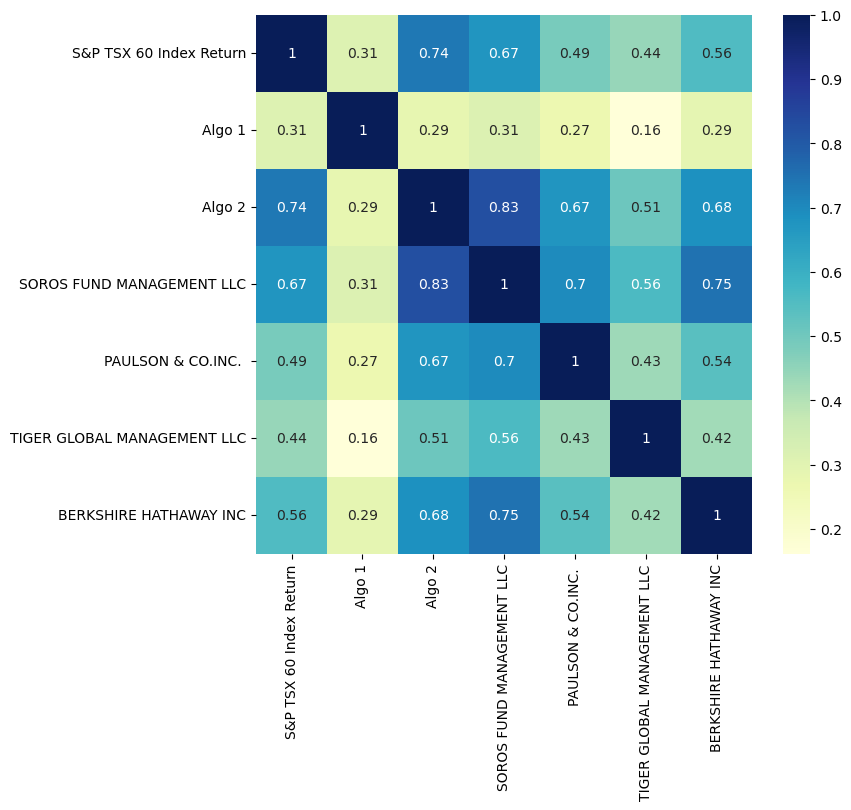

In [31]:
# Calculate the correlation
display(df_combine.corr())
# Display de correlation matrix
plt.figure(figsize=(8,7))
sns.heatmap(df_combine.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

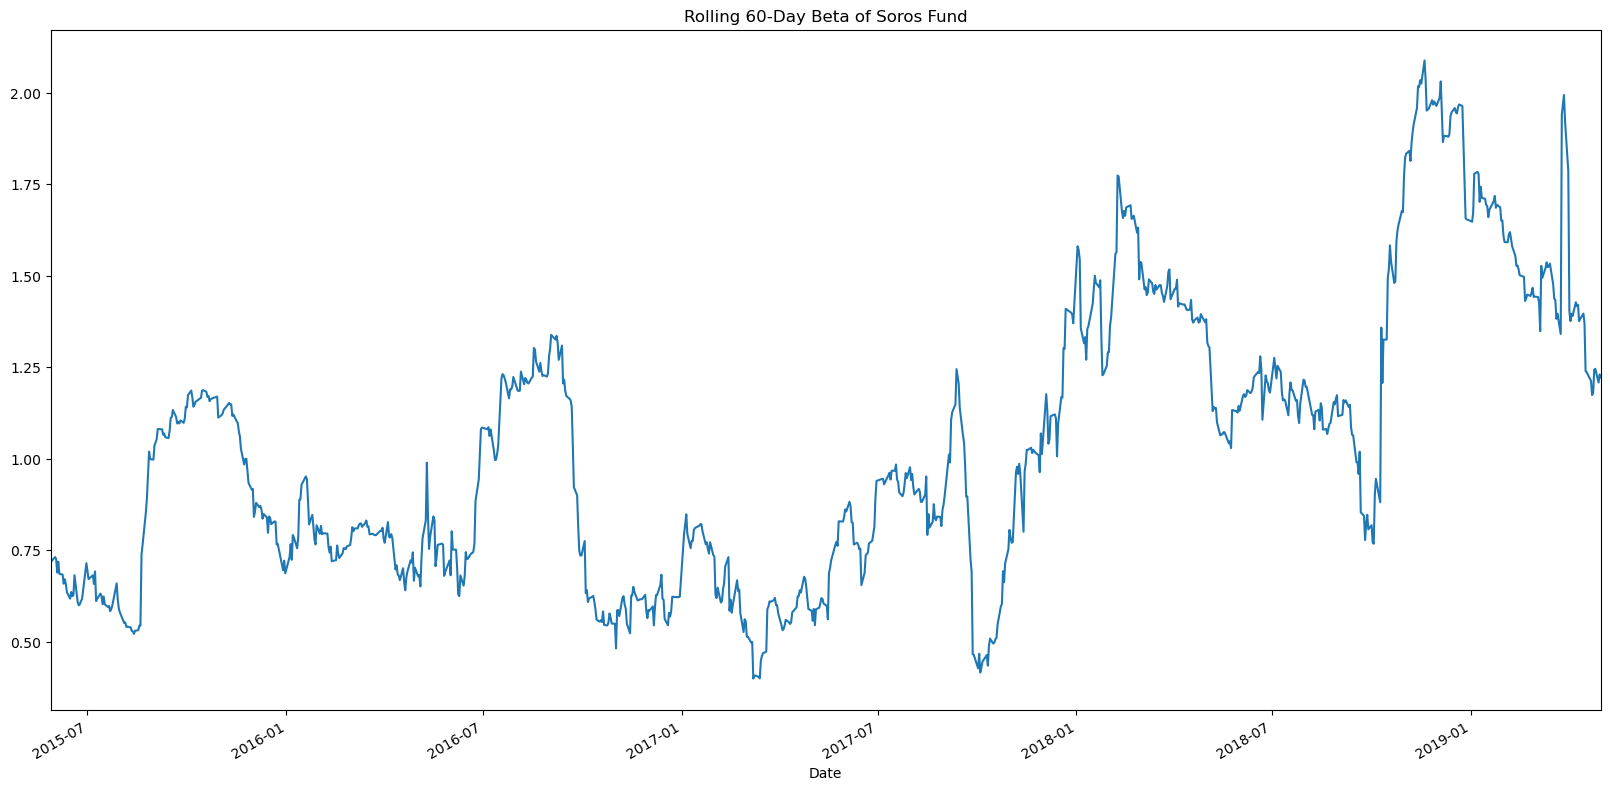

In [32]:
# Calculate covariance of a single portfolio
df_combine.set_index(df_combine['Date'],inplace=True)
rolling_covariance = df_combine['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_combine['S&P TSX 60 Index Return'])


# Calculate variance of S&P TSX
rolling_variance = df_combine['S&P TSX 60 Index Return'].rolling(window=60).var()


# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund')
plt.margins(x=0)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

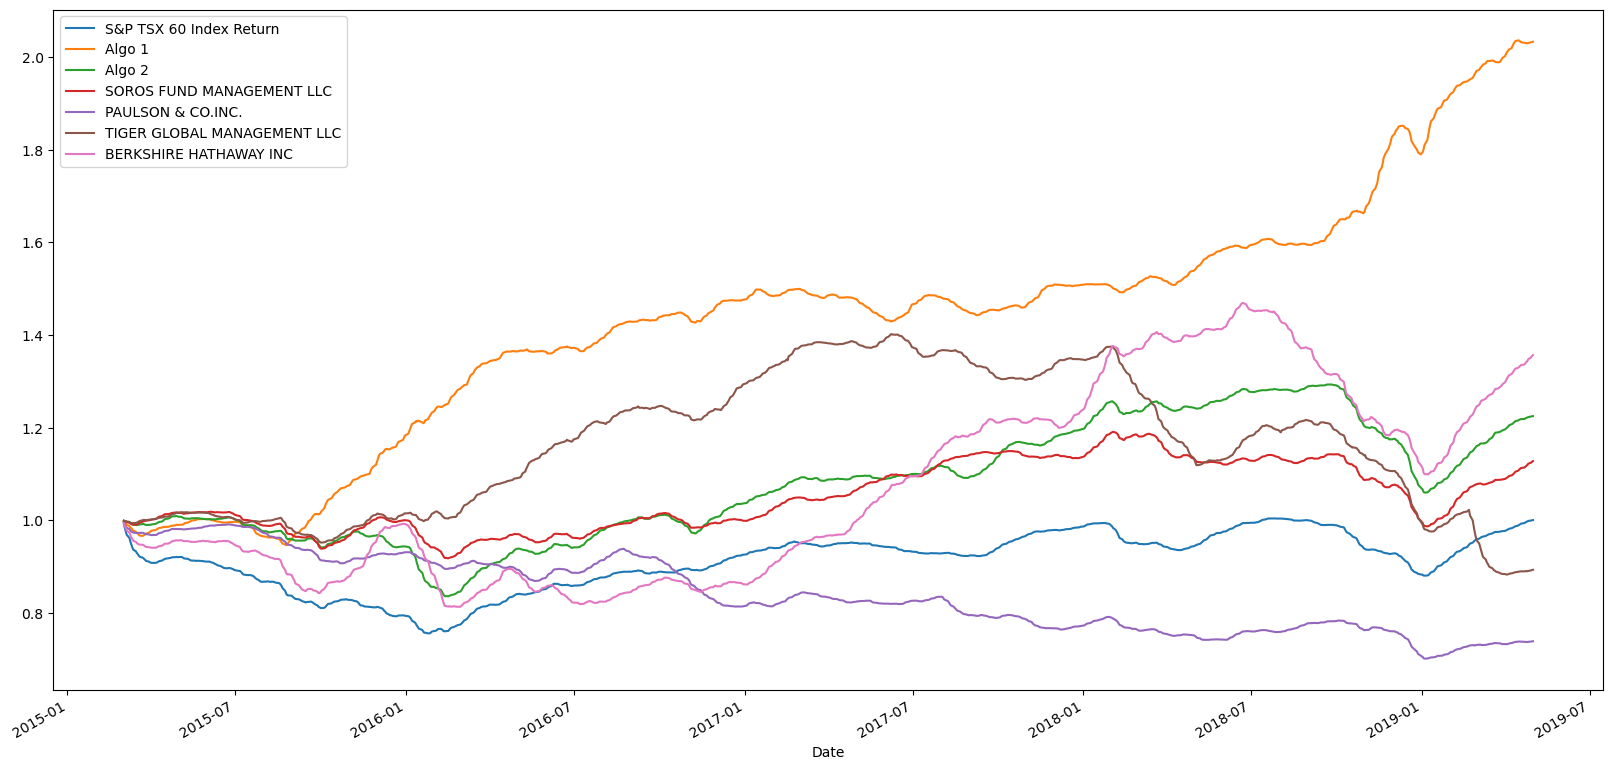

In [33]:
# Use `ewm` to calculate the rolling window

df_daily_ewm = df_combine.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = df_combine.mean()*252/(df_combine.std()*np.sqrt(252))
asr=pd.DataFrame(sharpe_ratios)
asr=asr.reset_index()
asr.columns=['Name','Ratio']
asr

,Name,Ratio
0,Algo 1,1.491514
1,Algo 2,0.396817
2,BERKSHIRE HATHAWAY INC,0.467045
3,Date,NaN
4,PAULSON & CO.INC.,-0.547594
5,S&P TSX 60 Index Return,0.19555
6,SOROS FUND MANAGEMENT LLC,0.286709
7,TIGER GLOBAL MANAGEMENT LLC,-0.144455


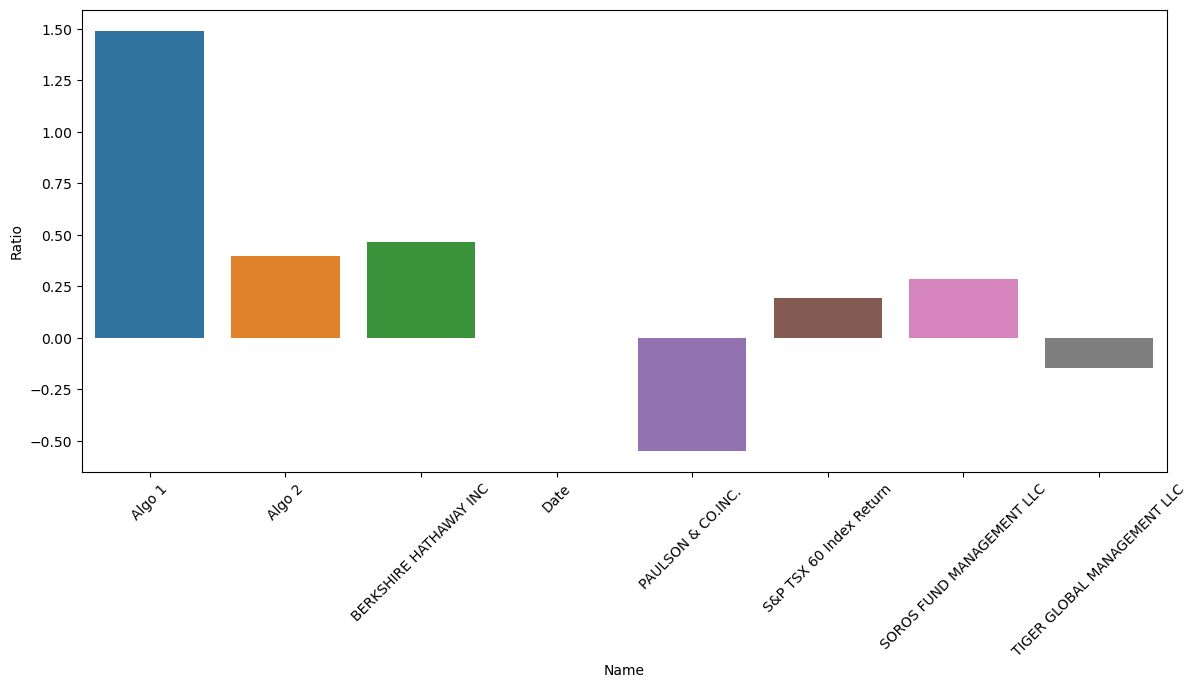

In [35]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(14,6))
sns.barplot(asr['Name'],asr['Ratio'])
plt.xticks(rotation = 45)
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
from pathlib import Path
l_historical = pd.read_csv(Path("Resources/l_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)

In [37]:
l_historical.drop('Symbol', axis=1, inplace=True)
l_historical.columns=['l_historical Close']
l_historical=l_historical.reset_index()
l_historical


,Date,l_historical Close
0,2018-01-02,57.99
1,2018-01-03,57.41
2,2018-01-04,57.42
3,2018-01-05,57.42
4,2018-01-08,56.86
...,...,...
496,2019-12-20,67.90
497,2019-12-23,67.68
498,2019-12-24,67.67
499,2019-12-27,67.78


In [38]:
# Reading data from 2nd stock
otex_historical = pd.read_csv(Path("Resources/otex_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)


In [39]:
otex_historical.drop('Symbol', axis=1, inplace=True)
otex_historical.columns=['otex_historical Close']
otex_historical=otex_historical.reset_index()
otex_historical

,Date,otex_historical Close
0,2018-01-02,43.58
1,2018-01-03,43.07
2,2018-01-04,42.91
3,2018-01-05,42.57
4,2018-01-08,42.16
...,...,...
496,2019-12-20,58.68
497,2019-12-23,57.89
498,2019-12-24,57.44
499,2019-12-27,57.70


In [40]:
# Reading data from 3rd stock
shop_historical = pd.read_csv(Path("Resources/shop_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)

In [41]:
shop_historical.drop('Symbol', axis=1, inplace=True)
shop_historical.columns=['shop_historical Close']
shop_historical=shop_historical.reset_index()
shop_historical

,Date,shop_historical Close
0,2018-01-02,132.06
1,2018-01-03,135.15
2,2018-01-04,137.46
3,2018-01-05,137.26
4,2018-01-08,139.51
...,...,...
496,2019-12-20,513.22
497,2019-12-23,511.62
498,2019-12-24,525.39
499,2019-12-27,534.76


In [42]:
# Combine all stocks in a single DataFrame
my_stocks_df=pd.merge(pd.merge(l_historical,otex_historical,on='Date', how='inner'),shop_historical,on='Date', how='inner')
my_stocks_df['Date']=pd.to_datetime(my_stocks_df['Date'])
my_stocks_df

,Date,l_historical Close,otex_historical Close,shop_historical Close
0,2018-01-02,57.99,43.58,132.06
1,2018-01-03,57.41,43.07,135.15
2,2018-01-04,57.42,42.91,137.46
3,2018-01-05,57.42,42.57,137.26
4,2018-01-08,56.86,42.16,139.51
...,...,...,...,...
496,2019-12-20,67.90,58.68,513.22
497,2019-12-23,67.68,57.89,511.62
498,2019-12-24,67.67,57.44,525.39
499,2019-12-27,67.78,57.70,534.76


In [43]:
# Reset Date index
my_stocks_df=my_stocks_df.reset_index(drop=True)

In [44]:
# Reorganize portfolio data by having a column per symbol
my_stocks_df

,Date,l_historical Close,otex_historical Close,shop_historical Close
0,2018-01-02,57.99,43.58,132.06
1,2018-01-03,57.41,43.07,135.15
2,2018-01-04,57.42,42.91,137.46
3,2018-01-05,57.42,42.57,137.26
4,2018-01-08,56.86,42.16,139.51
...,...,...,...,...
496,2019-12-20,67.90,58.68,513.22
497,2019-12-23,67.68,57.89,511.62
498,2019-12-24,67.67,57.44,525.39
499,2019-12-27,67.78,57.70,534.76


In [45]:
# Calculate daily returns
my_stocks_df_temp=my_stocks_df.copy()
for i in list(my_stocks_df_temp.columns)[1:]:
  my_stocks_df_temp[i]=my_stocks_df_temp[i].pct_change(1)
# Drop NAs
my_stocks_df_temp.dropna(inplace=True)
# Display sample data
my_stocks_df_temp

,Date,l_historical Close,otex_historical Close,shop_historical Close
1,2018-01-03,-0.010002,-0.011703,0.023398
2,2018-01-04,0.000174,-0.003715,0.017092
3,2018-01-05,0.000000,-0.007924,-0.001455
4,2018-01-08,-0.009753,-0.009631,0.016392
5,2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...,...
496,2019-12-20,0.003547,0.024441,-0.005503
497,2019-12-23,-0.003240,-0.013463,-0.003118
498,2019-12-24,-0.000148,-0.007773,0.026915
499,2019-12-27,0.001626,0.004526,0.017834


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
my_portfolio_returns=my_stocks_df.copy()
my_portfolio_returns = my_stocks_df.drop('Date',axis=1).pct_change().dot(weights)
my_portfolio_returns.dropna(inplace=True)
# Display sample data
my_portfolio_returns.head()

1    0.000565
2    0.004517
3   -0.003126
4   -0.000997
5   -0.000999
dtype: float64

In [47]:
df_combine


,Date,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2015-03-03,2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
df_combine=df_combine.reset_index(drop=True)
portfolio_returns = pd.concat((my_portfolio_returns,df_combine), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,Date,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,0.000565,2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2,0.004517,2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
3,-0.003126,2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
4,-0.000997,2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
5,-0.000999,2015-03-10,-0.014321,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739
...,...,...,...,...,...,...,...,...,...
496,0.007495,2017-03-06,0.001361,-0.001548,-0.005750,-0.003016,-0.010073,-0.004702,-0.006102
497,-0.006607,2017-03-07,-0.001342,-0.001838,-0.007664,-0.005288,-0.007044,-0.004209,0.000338
498,0.006331,2017-03-08,-0.007163,-0.003141,-0.004234,-0.004496,-0.001563,0.000866,0.002992
499,0.007995,2017-03-09,-0.000009,-0.000414,-0.002858,0.000069,-0.001656,0.003661,-0.001979


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combine=df_combine.reset_index(drop=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.013657
Date,213 days 18:55:40.072892608
S&P TSX 60 Index Return,0.008267
Algo 1,0.008402
Algo 2,0.009017
SOROS FUND MANAGEMENT LLC,0.007792
PAULSON & CO.INC.,0.007276
TIGER GLOBAL MANAGEMENT LLC,0.01006
BERKSHIRE HATHAWAY INC,0.012999


### Calculate and plot rolling `std` with 21-day window

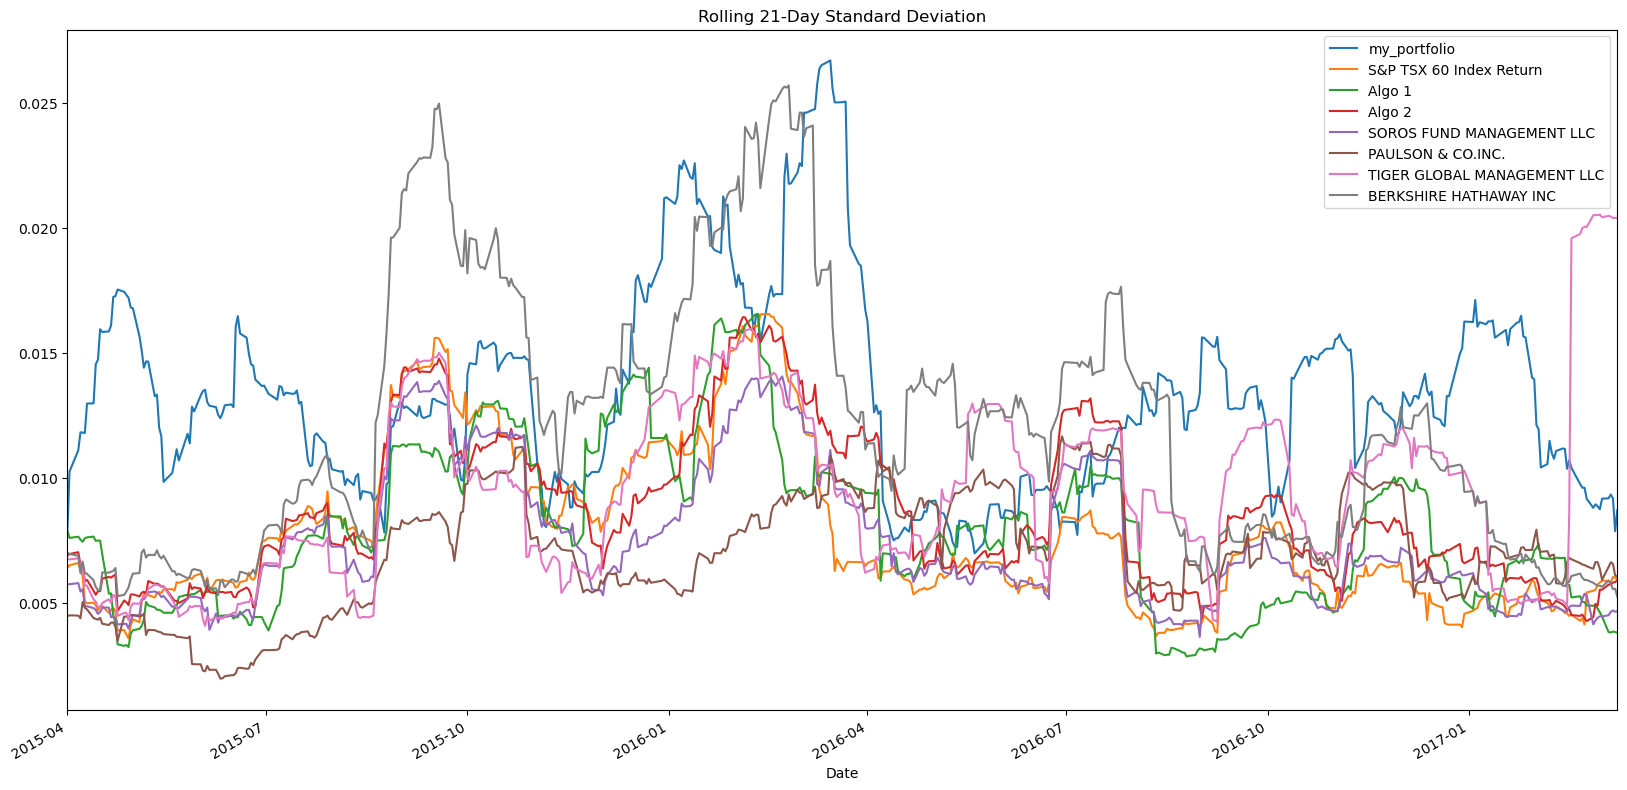

In [51]:
# Calculate rolling standard deviation
portfolio_returns=portfolio_returns.set_index(portfolio_returns['Date'])
my_portfolio_rolling_21 = portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
ax = my_portfolio_rolling_21.plot(figsize = (20,10), title = 'Rolling 21-Day Standard Deviation')
plt.margins(x=0)

### Calculate and plot the correlation

<AxesSubplot:>

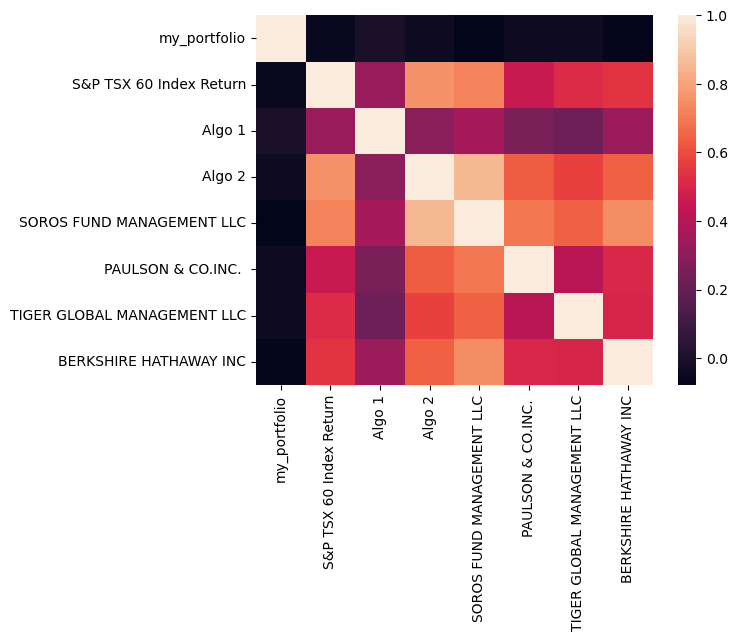

In [52]:
# Calculate and plot the correlation
sns.heatmap(portfolio_returns.corr())

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [53]:
portfolio_returns

,my_portfolio,Date,S&P TSX 60 Index Return,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,,
2015-03-04,0.000565,2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004517,2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003126,2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.000997,2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.000999,2015-03-10,-0.014321,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739
...,...,...,...,...,...,...,...,...,...
2017-03-06,0.007495,2017-03-06,0.001361,-0.001548,-0.005750,-0.003016,-0.010073,-0.004702,-0.006102
2017-03-07,-0.006607,2017-03-07,-0.001342,-0.001838,-0.007664,-0.005288,-0.007044,-0.004209,0.000338
2017-03-08,0.006331,2017-03-08,-0.007163,-0.003141,-0.004234,-0.004496,-0.001563,0.000866,0.002992


<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

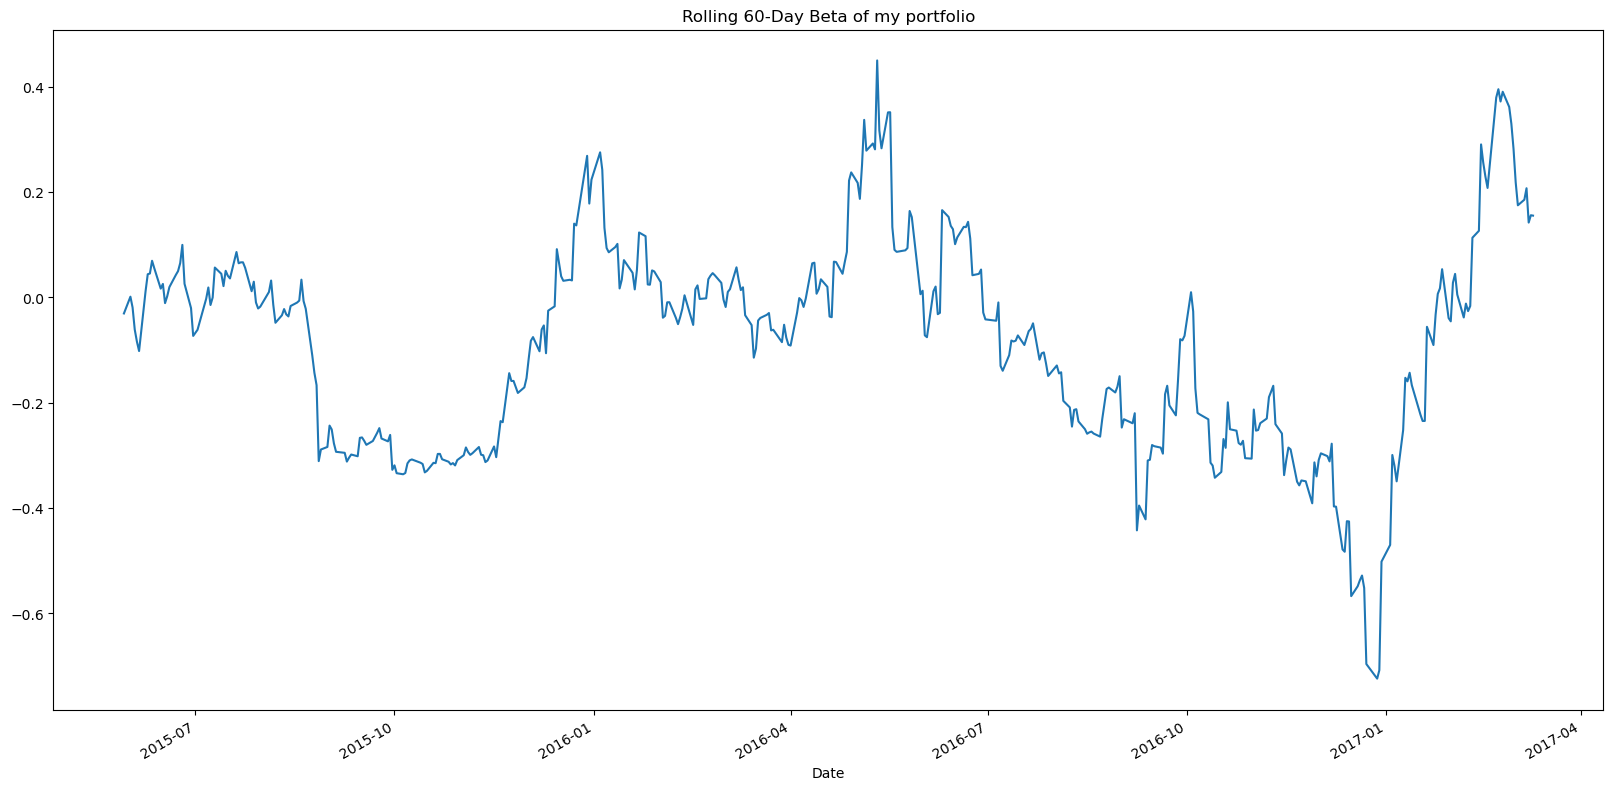

In [54]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['S&P TSX 60 Index Return'])
rolling_variance = portfolio_returns['S&P TSX 60 Index Return'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualized Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

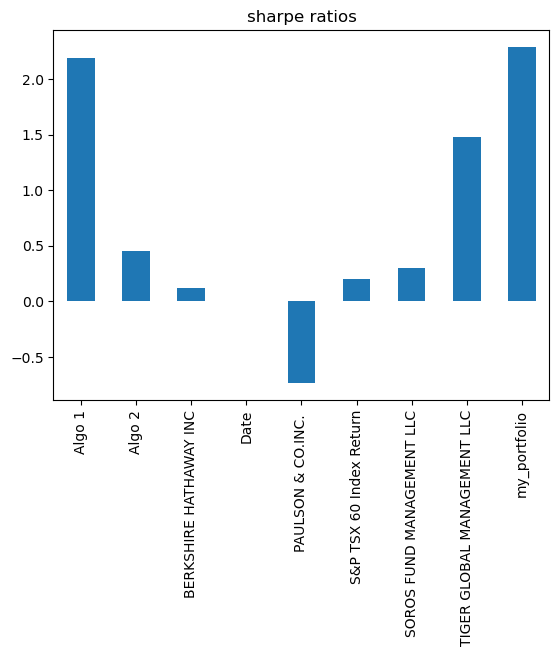

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!